In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sentiments = pd.read_csv('./Reddit_Combined_Sentiments.csv')
sentiments

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,sentiment_polarity,cluster,sentiment_polarity_summary
0,0,0,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,schu4KSU,peopl like everywher world differ enough gain ...,1,0.7096,2,positive
1,1,1,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,StupidizeMe,well certainli enough caus massiv surg covid 1...,0,-0.4215,0,negative
2,2,2,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Eltharion-the-Grim,they larg absent asia the place i recal read s...,0,0.0000,1,neutral
3,3,3,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Thisam,yup percentag popul easili deceiv fall conspir...,0,0.0772,1,neutral
4,4,4,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,NaN,short answer ye look usa brexit pass long answ...,0,-0.0000,1,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12170,885,885,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,McGloin_the_GOAT,thi econom analysi econom decis made margin me...,0,0.2960,2,positive
12171,886,886,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,Zamaamiro,thi sub seem attract r lockdownskeptic poster ...,1,0.2732,1,neutral
12172,887,887,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,NaN,i say true thi sub like commun hover around ce...,0,0.9607,2,positive
12173,888,888,0,g8dyy2,StudentjeNL,When to release the lockdown: A wellbeing fram...,231,314,1.587906e+09,2020-04-26 21:02:11,jphamlore,fortun anoth model ihm capabl make precis reco...,1,0.4939,2,positive


In [3]:
# random split train and test data
index = sentiments.index
sentiments['random_number'] = np.random.randn(len(index))
train = sentiments[sentiments['random_number'] <= 0.8]
test = sentiments[sentiments['random_number'] > 0.8]

In [4]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['comment'].values.astype('U'))
test_matrix = vectorizer.transform(test['comment'].values.astype('U'))

In [5]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [6]:
# Split target and independent variables
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment_polarity_summary']
y_test = test['sentiment_polarity_summary']

In [7]:
# Fit model on data
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Make predictions
predictions = lr.predict(X_test)

In [9]:
# Test - find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix, classification_report
new = np.asarray(y_test)
cf_matrix = confusion_matrix(predictions, y_test, labels=['negative', 'neutral', 'positive'])
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

    negative       0.77      0.65      0.71      1404
     neutral       0.47      0.63      0.54       588
    positive       0.77      0.80      0.78       615

    accuracy                           0.68      2607
   macro avg       0.67      0.69      0.68      2607
weighted avg       0.70      0.68      0.69      2607



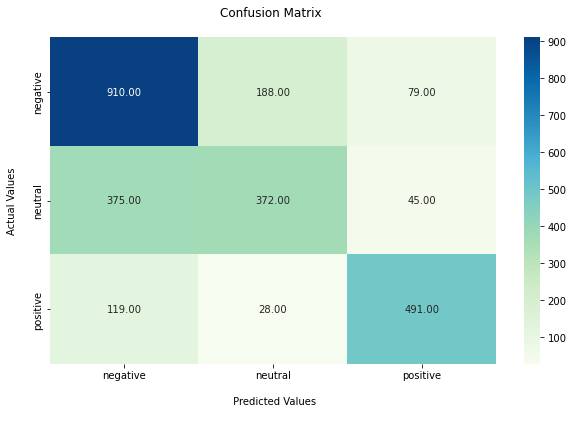

In [10]:
# Visualize Confusion Matrix
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['negative', 'neutral', 'positive'])
fx.yaxis.set_ticklabels(['negative', 'neutral', 'positive'])
plt.savefig('../Reddit_Output/Reddit_Confusion_Matrix.png')
plt.show()